# What is the relationship between TikTok views and Spotify streams?

In [3]:
# Dependencies
import pandas as pd                     # for handling and structuring data
import matplotlib.pyplot as plt         # for creating plots
import scipy.stats as st                # for statistical functions
import numpy as np                      # for generating random numbers and handling numerical operations
from scipy.stats import linregress      # for calculating linear regression
import matplotlib.ticker as ticker      # for formatting axis ticks (e.g., adding commas to large numbers)

# Load the CSV file
file_path = 'Resources/new_data.csv'
csv_df = pd.read_csv(file_path, header=0)

# Display sheet names to identify relevant data
print(csv_df)

                                Track                        Album Name  \
0                 MILLION DOLLAR BABY      Million Dollar Baby - Single   
1                         Not Like Us                       Not Like Us   
2          i like the way you kiss me        I like the way you kiss me   
3                             Flowers                  Flowers - Single   
4                             Houdini                           Houdini   
...                               ...                               ...   
4595                For the Last Time                 For the Last Time   
4596                 Dil Meri Na Sune  Dil Meri Na Sune (From "Genius")   
4597            Grace (feat. 42 Dugg)                           My Turn   
4598              Nashe Si Chadh Gayi             November Top 10 Songs   
4599  Me Acostumbre (feat. Bad Bunny)   Me Acostumbre (feat. Bad Bunny)   

              Artist Release Date All Time Rank Spotify Streams  \
0      Tommy Richman    4/26/202

In [4]:
# Select relevant columns

columns_to_select=['Track', 'Artist', 'Spotify Popularity', 'Spotify Streams', 'TikTok Views']

data = csv_df[columns_to_select].copy()

# Rename specific columns
data.rename(columns={'Track': 'Song'}, inplace=True)

data.head()

,Song,Artist,Spotify Popularity,Spotify Streams,TikTok Views
0,MILLION DOLLAR BABY,Tommy Richman,92.0,"390,470,936","5,332,281,936"
1,Not Like Us,Kendrick Lamar,92.0,"323,703,884","208,339,025"
2,i like the way you kiss me,Artemas,92.0,"601,309,283","3,369,120,610"
3,Flowers,Miley Cyrus,85.0,"2,031,280,633","14,603,725,994"
4,Houdini,Eminem,88.0,"107,034,922",NaN


In [5]:
# Show count of each column
data.count()

Song                  4600
Artist                4595
Spotify Popularity    3796
Spotify Streams       4487
TikTok Views          3619
dtype: int64

In [6]:
# Drop blank rows
data_cleaned = data.dropna()
data_cleaned.count()

Song                  3302
Artist                3302
Spotify Popularity    3302
Spotify Streams       3302
TikTok Views          3302
dtype: int64

In [7]:
# Show new data
print(data_cleaned.dtypes)

Song                   object
Artist                 object
Spotify Popularity    float64
Spotify Streams        object
TikTok Views           object
dtype: object


In [8]:
# Spotify Streams and TikTok Views are objects - convert to numeric
# Function to convert to numeric
def convert_to_numeric(value):
    if pd.isna(value):                              # check if value is NaN
        return np.nan
    try:
        return float(str(value).replace(',', ''))   # Remove commas and convert to float
    except ValueError:                              # handle cases where conversion fails
        return np.nan

# Apply the conversion to both columns
data_cleaned['Spotify Streams'] = data_cleaned['Spotify Streams'].apply(convert_to_numeric)
data_cleaned['TikTok Views'] = data_cleaned['TikTok Views'].apply(convert_to_numeric)

# Check the results
print("After conversion:")
print(data_cleaned[['Spotify Streams', 'TikTok Views', 'Spotify Popularity']].dtypes)
print(data_cleaned[['Spotify Streams', 'TikTok Views', 'Spotify Popularity']].count())

# Check for any remaining non-numeric values
print("\nNon-numeric values in Spotify Streams:")
print(data_cleaned[pd.isna(data_cleaned['Spotify Streams'])]['Spotify Streams'].head())

print("\nNon-numeric values in TikTok Views:")
print(data_cleaned[pd.isna(data_cleaned['TikTok Views'])]['TikTok Views'].head())

# Display sample of original values
print("\nSample of original Spotify Streams values:")
print(data_cleaned['Spotify Streams'].head())

print("\nSample of original TikTok Views values:")
print(data_cleaned['TikTok Views'].head())

After conversion:
Spotify Streams       float64
TikTok Views          float64
Spotify Popularity    float64
dtype: object
Spotify Streams       3302
TikTok Views          3302
Spotify Popularity    3302
dtype: int64

Non-numeric values in Spotify Streams:
Series([], Name: Spotify Streams, dtype: float64)

Non-numeric values in TikTok Views:
Series([], Name: TikTok Views, dtype: float64)

Sample of original Spotify Streams values:
0    3.904709e+08
1    3.237039e+08
2    6.013093e+08
3    2.031281e+09
5    6.706654e+08
Name: Spotify Streams, dtype: float64

Sample of original TikTok Views values:
0    5.332282e+09
1    2.083390e+08
2    3.369121e+09
3    1.460373e+10
5    2.938687e+09
Name: TikTok Views, dtype: float64


C:\Users\sarah\AppData\Local\Temp\ipykernel_34908\273397780.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Spotify Streams'] = data_cleaned['Spotify Streams'].apply(convert_to_numeric)
C:\Users\sarah\AppData\Local\Temp\ipykernel_34908\273397780.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['TikTok Views'] = data_cleaned['TikTok Views'].apply(convert_to_numeric)


In [9]:
# Sort by TikTok Views
tik_tok_sort = data_cleaned.sort_values(by='TikTok Views', ascending=True)

tik_tok_sort.to_csv('check.csv',index=False)

# Scatterplot of TikTok Views vs. Spotify Popularity

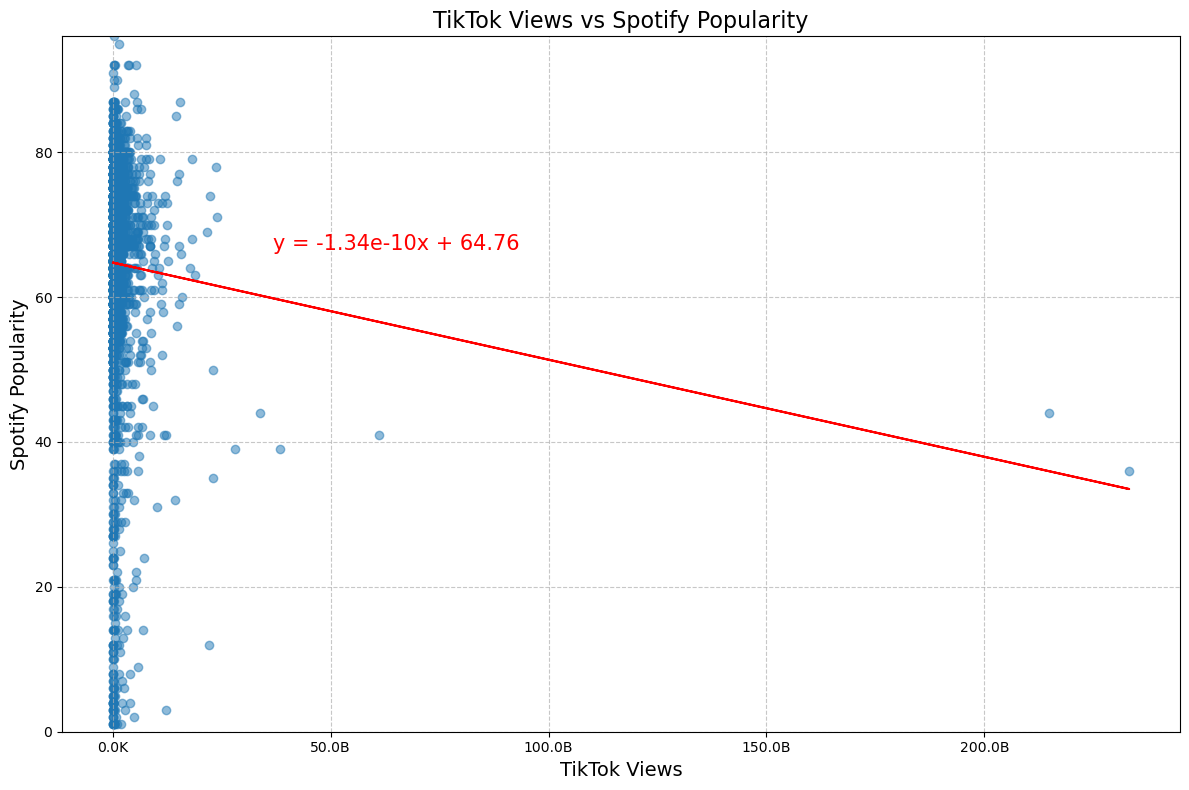

Correlation between TikTok Views and Spotify Popularity: -0.0578
R-squared: 0.0033


In [10]:
# Define a function to format axis ticks
def format_ticks(x, pos):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'  # convert to billions (e.g. 1,000,000,000 -> 1.0B)
    elif x >= 1e6:
        return f'{x/1e6:.1f}M'  # convert to millions (e.g. 1,000,000 -> 1.0M)
    else:
        return f'{x/1e3:.1f}K'  # convert to thousands (e.g. 1,000 -> 1.0K)

# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(data_cleaned['TikTok Views'], 
            data_cleaned['Spotify Popularity'], 
            alpha=0.5)          # alpha for transparency

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(data_cleaned['TikTok Views'], 
                                                            data_cleaned['Spotify Popularity'])
line = slope * data_cleaned['TikTok Views'] + intercept

# Plot the line of best fit
plt.plot(data_cleaned['TikTok Views'], line, color='r', 
         label=f'y = {slope:.2e}x + {intercept:.2f}')     # uses scientific notation for slope for readability

# Add the formula as a label on the graph
x_pos = data_cleaned['TikTok Views'].mean()    # x-position for the label
y_pos = slope * x_pos + intercept                         # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(200,10),                             # offest text so it's not directly on top of data
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('TikTok Views', fontsize=14)
plt.ylabel('Spotify Popularity', fontsize=14)
plt.title('TikTok Views vs Spotify Popularity', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set y-axis limits
max_popularity = data_cleaned['Spotify Popularity'].max()
plt.ylim(0, max_popularity)                               # this sets the y-axis range

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation
correlation = data_cleaned['TikTok Views'].corr(data_cleaned['Spotify Popularity'])
print(f"Correlation between TikTok Views and Spotify Popularity: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")

#### Analysis Summary
##### The correlation coefficient of -0.0578 between TikTok Views and Spotify Popularity indicates a very weak negative correlation between these two factors. Since the value is so close to zero, it suggests only a slight tendency for Spotify Popularity to decrease as TikTok Likes increase, and vice versa. However, this relationship is not significant enough to have any meaningful impact when predicting an artist's popularity. The near-zero correlation also points to the possibility that TikTok Views and Spotify Popularity are largely independent variables.
##### The line of best fit is represented by the equation y = -1.34e-10x + 64.76, with an R-squared value of 0.0033. This further reinforces the notion that the two variables do not show any meaningful predictive relationship.
##### For the next steps, I will narrow the dataset to the top 500 entries and further explore the relationship between TikTok views and Spotify streams.

# Scatterplot of Top 500 TikTok Views vs. Spotify Streams

In [11]:
# Create top 500 TikTok dataframe

# Sort DataFrame by TikTok Views in descending order
top_500_tiktok_df = data_cleaned.sort_values(by='TikTok Views', ascending=False).head(500)

# Apply styling for better readability (for display purposes)
formatted_500_tiktok_df = top_500_tiktok_df[['Song', 'TikTok Views', 'Spotify Streams']].style.format({
    'TikTok Views': '{:,.2f}',
    'Spotify Streams': '{:,.2f}',  # Add commas, 2 decimals
})


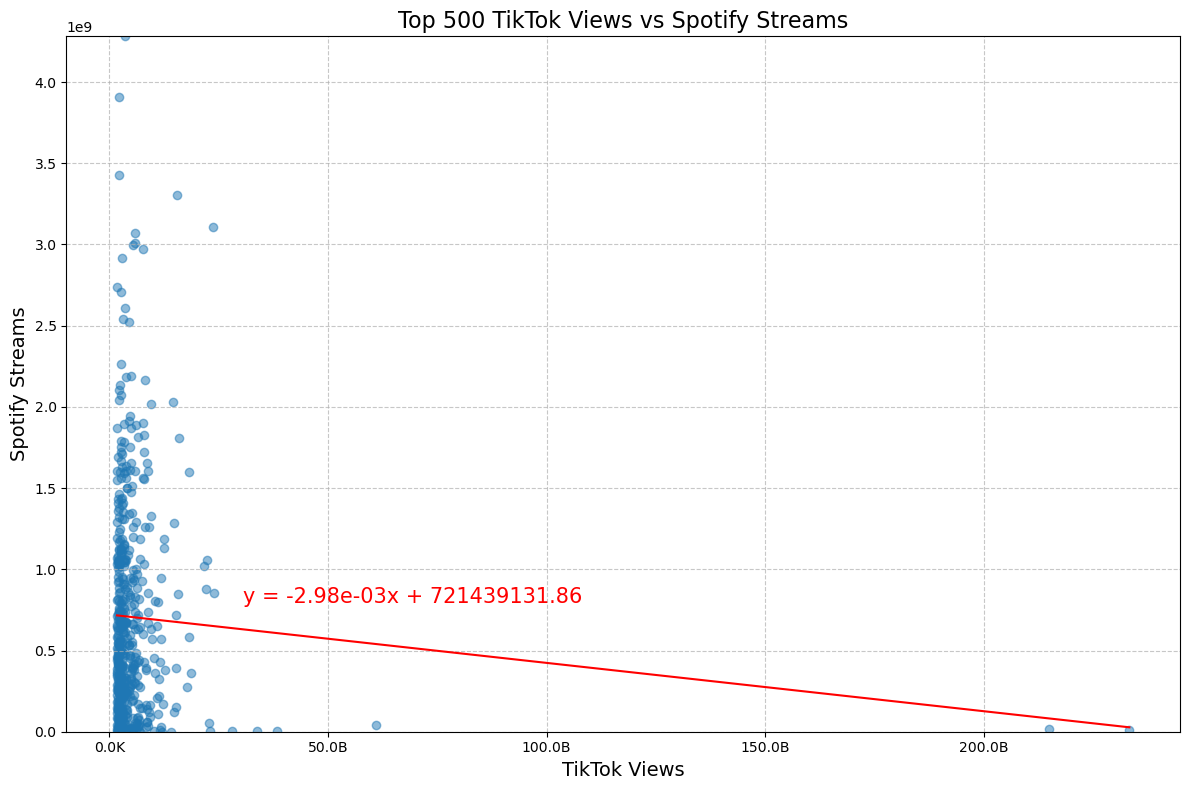

Correlation between TikTok Views and Spotify Streams: -0.0644
R-squared: 0.0041


In [12]:
# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(top_500_tiktok_df['TikTok Views'], 
            top_500_tiktok_df['Spotify Streams'], 
            alpha=0.5)          # alpha for transparency

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(top_500_tiktok_df['TikTok Views'], 
                                                            top_500_tiktok_df['Spotify Streams'])
line = slope * top_500_tiktok_df['TikTok Views'] + intercept

# Plot the line of best fit
plt.plot(top_500_tiktok_df['TikTok Views'], line, color='r', 
         label=f'y = {slope:.2e}x + {intercept:.2f}')     # uses scientific notation for slope for readability

# Add the formula as a label on the graph
x_pos = top_500_tiktok_df['TikTok Views'].mean()          # x-position for the label
y_pos = slope * x_pos + intercept                         # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(200,10),                             # offest text so it's not directly on top of data
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('TikTok Views', fontsize=14)
plt.ylabel('Spotify Streams', fontsize=14)
plt.title('Top 500 TikTok Views vs Spotify Streams', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set y-axis limits
max_popularity = top_500_tiktok_df['Spotify Streams'].max()
plt.ylim(0, max_popularity)                               # this sets the y-axis range

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation
correlation = top_500_tiktok_df['TikTok Views'].corr(top_500_tiktok_df['Spotify Streams'])
print(f"Correlation between TikTok Views and Spotify Streams: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")

#### Analysis Summary
##### The scatterplot for the relationship between Spotify streams (in millions) and the top 500 Tiktok views (in millions) shows an extremely weak correlation. The linear regression line, with the equation y=-0.0x+895,320,716.81, shows a near-zero rate of change, meaning that the changes in TikTok views have little to no impact on Spotify streams. With the slight negative slope, on a very minimal level, we see as TikTok views increase, Spotify streams tend to decrease, though this effect is minuscule. The r2 value of 0.001 reinforces this lack of correlation.
##### The scatterplot show a large concentration of data points near the origin (0,0), where both TikTok views and Spotify streams are relatively low. For TikTok views, the x-axis shows a majority of the values ranging from 0 to 20 billion, and a majority of the Spotify streams ranging from 0 to about 2 billion. This suggests that many songs with low TikTok views also have low Spotify streams. There are some data points scattered along the Spotify stream axis, show that some songs can achieve high spotify streams, even with low TikTok views. 
##### Looking at this scatterplot, my curiosity leans towards what this scatterplot would look like if the top 500 Spotify streams were the constant. Would the data show more spread?

# Scatterplot of Top 500 Spotify Streams vs. TikTok Views

In [13]:
# Create top 500 Spotify dataframe

# Sort DataFrame by Spotify streams in descending order
top_500_spotify_df = data_cleaned.sort_values(by='Spotify Streams', ascending=False).head(500)

# Apply styling for better readability (for display purposes)
formatted_500_spotify_df = top_500_spotify_df[['Song', 'TikTok Views', 'Spotify Streams']].style.format({
    'TikTok Views': '{:,.2f}',
    'Spotify Streams': '{:,.2f}',  # Add commas, 2 decimals
})


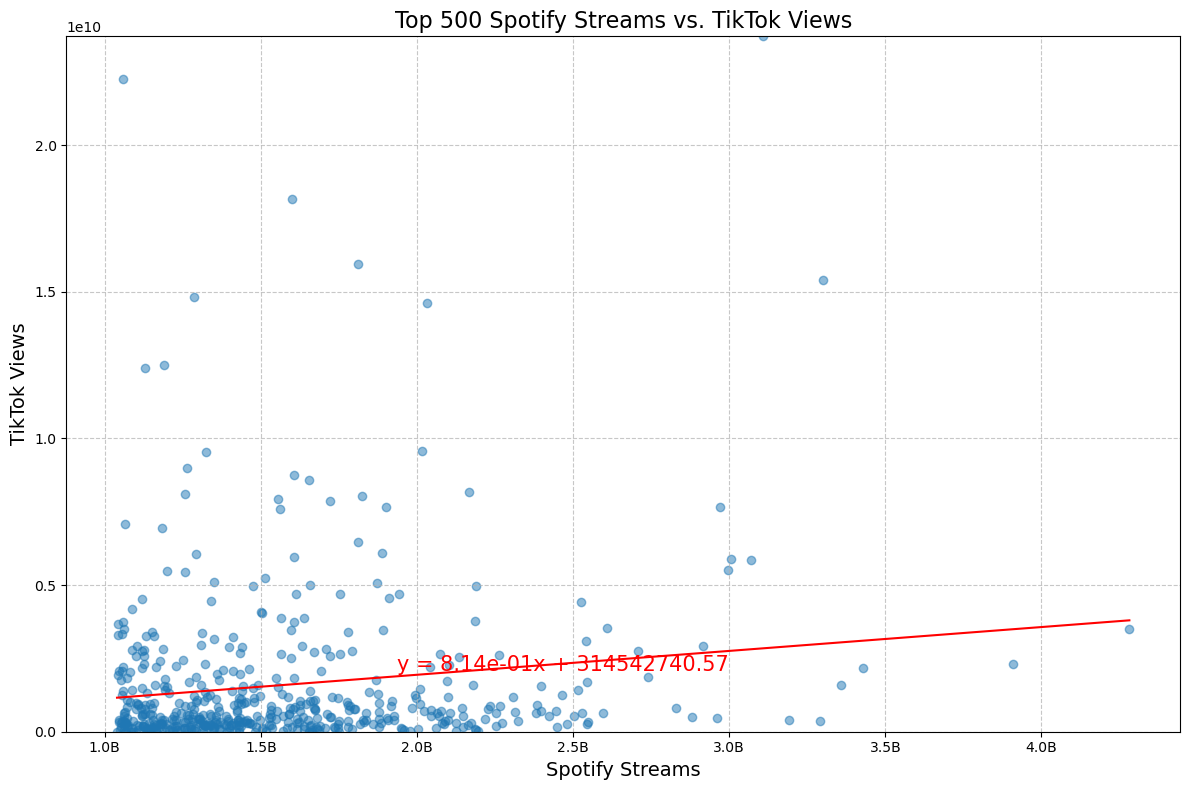

Correlation between Spotify Streams and TikTok Views: 0.1451
R-squared: 0.0210


In [14]:
# Create the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(top_500_spotify_df['Spotify Streams'], 
            top_500_spotify_df['TikTok Views'], 
            alpha=0.5)          # alpha for transparency

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = st.linregress(top_500_spotify_df['Spotify Streams'], 
                                                            top_500_spotify_df['TikTok Views'])
line = slope * top_500_spotify_df['Spotify Streams'] + intercept

# Plot the line of best fit
plt.plot(top_500_spotify_df['Spotify Streams'], line, color='r', 
         label=f'y = {slope:.2e}x + {intercept:.2f}')     # uses scientific notation for slope for readability

# Add the formula as a label on the graph
x_pos = top_500_spotify_df['Spotify Streams'].mean()          # x-position for the label
y_pos = slope * x_pos + intercept                             # corresponding y-position on the line
plt.annotate(f'y = {slope:.2e}x + {intercept:.2f}', 
             (x_pos, y_pos), 
             textcoords="offset points", 
             xytext=(200,10),                             # offest text so it's not directly on top of data
             ha='center', 
             fontsize=15, 
             color='red')

# Set labels and title
plt.xlabel('Spotify Streams', fontsize=14)
plt.ylabel('TikTok Views', fontsize=14)
plt.title('Top 500 Spotify Streams vs. TikTok Views', fontsize=16)

# Format x-axis ticks
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_ticks))

# Set y-axis limits
max_popularity = top_500_spotify_df['TikTok Views'].max()
plt.ylim(0, max_popularity)                               # this sets the y-axis range

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout to use space efficiently
plt.tight_layout()

# Show the plot
plt.show()

# Calculate and print the correlation
correlation = top_500_spotify_df['Spotify Streams'].corr(top_500_spotify_df['TikTok Views'])
print(f"Correlation between Spotify Streams and TikTok Views: {correlation:.4f}")
print(f"R-squared: {r_value**2:.4f}")

#### Analysis Summary
##### When Spotify is used as the control, the relationship between TikTok views and Spotify streams presents a different narrative compared to when TikTok is the control. The regression equation, 8.14e-01x + 314542740.57, suggests a slight upward trend, indicating that as Spotify streams increase, TikTok views also tend to rise. However, the R-squared value of 0.0210 points to a weak correlation, revealing that a song's success on Spotify does not strongly predict its virality on TikTok.
##### A notable difference lies in the spread of the data. When TikTok was the control, the data points were more tightly clustered, implying that TikTok hits had varying levels of success on Spotify. In contrast, when Spotify serves as the control, the distribution of TikTok views is much more dispersed. While some songs perform well on both platforms, this is far from a consistent trend.
##### Overall, this scatterplot challenges the assumption that TikTok is the primary driver of success on Spotify. It reveals that a song can achieve significant success on Spotify without necessarily going viral on TikTok, suggesting that the platforms influence each other in more complex ways than initially assumed.

## Does the top 10 most viewed TikTok songs have high spotify streaming?

### Bar Chart of Top 10 TikTok Views vs. Spotify Streaming (%)

In [15]:
# Create the top 10 tiktok views dataframe

# Sort DataFrame by TikTok Views in descending order
top_ten_tiktok_df = top_500_tiktok_df.sort_values(by='TikTok Views', ascending=False).head(10)

# Display top 10 TikTok-viewed songs with their Spotify Streams
top_ten_tiktok_df[['Song', 'TikTok Views', 'Spotify Streams']]

# Apply styling for better readability (for display purposes)
formatted_ten_tiktok_df = top_ten_tiktok_df[['Song', 'TikTok Views', 'Spotify Streams']].style.format({
    'TikTok Views': '{:,.2f}',
    'Spotify Streams': '{:,.2f}',  # Add commas, 2 decimals
})

formatted_ten_tiktok_df


,Song,TikTok Views,Spotify Streams
1024,Monkeys Spinning Monkeys,"233,232,311,463.00","11,477,477.00"
1922,Love You So,"214,843,956,590.00","16,326,628.00"
474,Oh No,"61,088,562,861.00","40,284,121.00"
1547,Funny Song,"38,373,644,011.00","5,866,282.00"
113,Aesthetic,"33,870,791,454.00","5,712,985.00"
3383,Pieces,"28,032,695,489.00","5,467,217.00"
255,love nwantiti (ah ah ah),"23,933,379,729.00","853,451,422.00"
26,STAY (with Justin Bieber),"23,712,377,029.00","3,107,100,349.00"
25,Beat Automotivo Tan Tan Tan Viral,"22,918,660,728.00","7,382,759.00"
1255,Steven Universe,"22,902,123,485.00","54,104,852.00"


In [16]:
# Create a dataframe with percentages of TikTok Views and Spotify streaming

# Calculate the percentages
total_tiktok = top_ten_tiktok_df['TikTok Views'].sum()     # find the total sum first
total_spotify  = top_ten_tiktok_df['Spotify Streams'].sum()

# Convert each song into a percentage of the total
top_ten_tiktok_df['TikTok Percentage'] = (top_ten_tiktok_df['TikTok Views'] / total_tiktok) * 100
top_ten_tiktok_df['Spotify Percentage'] = (top_ten_tiktok_df['Spotify Streams'] / total_spotify) * 100

# Apply styling for better readability
formatted_ten_tiktok_df = top_ten_tiktok_df[['Song', 'TikTok Views', 'Spotify Streams', 'TikTok Percentage', 'Spotify Percentage']].style.format({
    'TikTok Views': '{:,.2f}',
    'Spotify Streams': '{:,.2f}',
    'TikTok Percentage': '{:.0f}%',
    'Spotify Percentage': '{:.0f}%'
})

formatted_ten_tiktok_df

,Song,TikTok Views,Spotify Streams,TikTok Percentage,Spotify Percentage
1024,Monkeys Spinning Monkeys,"233,232,311,463.00","11,477,477.00",33%,0%
1922,Love You So,"214,843,956,590.00","16,326,628.00",31%,0%
474,Oh No,"61,088,562,861.00","40,284,121.00",9%,1%
1547,Funny Song,"38,373,644,011.00","5,866,282.00",5%,0%
113,Aesthetic,"33,870,791,454.00","5,712,985.00",5%,0%
3383,Pieces,"28,032,695,489.00","5,467,217.00",4%,0%
255,love nwantiti (ah ah ah),"23,933,379,729.00","853,451,422.00",3%,21%
26,STAY (with Justin Bieber),"23,712,377,029.00","3,107,100,349.00",3%,76%
25,Beat Automotivo Tan Tan Tan Viral,"22,918,660,728.00","7,382,759.00",3%,0%
1255,Steven Universe,"22,902,123,485.00","54,104,852.00",3%,1%


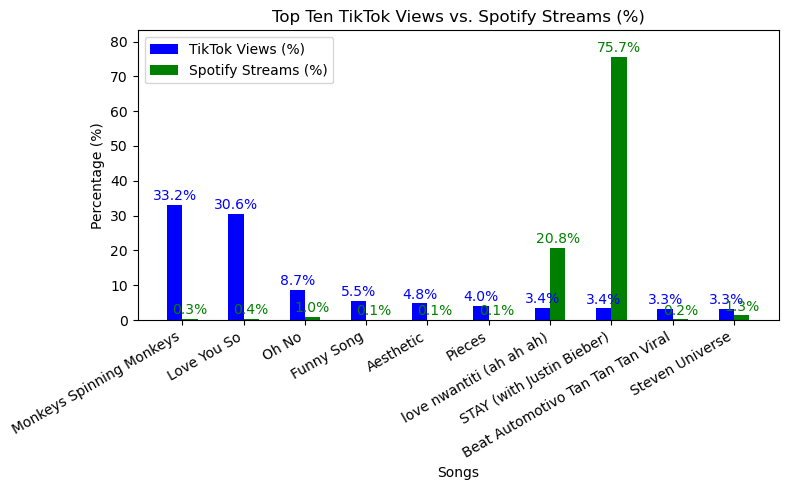

In [17]:
# Create a bar chart comparing the percentages of tiktok views and spotify streaming

# Prepare the bar chart
x = np.arange(len(top_ten_tiktok_df['Song']))  # the label locations
width = 0.25                                   # the width of the bars

# Create the subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the bars
tiktok_bar = ax.bar(x-width/2, top_ten_tiktok_df['TikTok Percentage'], width, label='TikTok Views (%)', color='blue')
spotify_bar = ax.bar(x+width/2, top_ten_tiktok_df['Spotify Percentage'], width, label='Spotify Streams (%)', color='green')

# Formatting
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Songs')
ax.set_title('Top Ten TikTok Views vs. Spotify Streams (%)')
ax.set_xticks(x)
ax.set_xticklabels(top_ten_tiktok_df['Song'], rotation=30, ha='right')  # Rotate labels for readability
ax.legend()

# Fix y-limit to match percentage values
max_percentage = max(top_ten_tiktok_df['TikTok Percentage'].max(), top_ten_tiktok_df['Spotify Percentage'].max())
ax.set_ylim(0, max_percentage * 1.1)     # Set y-limit slightly above max percentage

# Add labels above bars
for i, (tiktok, spotify) in enumerate(zip(top_ten_tiktok_df['TikTok Percentage'], top_ten_tiktok_df['Spotify Percentage'])):
    ax.text(i - width/2, tiktok + 0.5, f"{tiktok:.1f}%", ha='center', va='bottom', fontsize=10, color='blue')
    ax.text(i + width/2, spotify + 0.5, f"{spotify:.1f}%", ha='center', va='bottom', fontsize=10, color='green')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


#### Analysis Summary
##### The percentage bar graphs reveal a consistent trend: a song’s popularity on TikTok does not always translate to proportional success on Spotify. For instance, a song ranked #8 on TikTok reaching #1 on Spotify suggests that virality on TikTok does not guarantee streaming dominance. This highlights how some songs thrive within TikTok trends but may not have lasting appeal for full-length listening, while others achieve streaming success without widespread TikTok engagement.
##### Looking at this bar chart, my curiosity leans towards what this would look like if the top 10 Spotify streams were the constant. Would the bars reveal something different?

### Bar Chart of Top 10 Spotify Streaming vs. TikTok Views (%)

In [18]:
#Create a top 10 spotify streaming dataframe

# Sort DataFrame by TikTok Views in descending order
top_ten_spotify_df = top_500_spotify_df.sort_values(by='Spotify Streams', ascending=False).head(10)

# Display top 10 Spotify songs with their TikTok views
top_ten_spotify_df[['Song', 'TikTok Views', 'Spotify Streams']]

# Calculate the percentages
total_tiktok = top_ten_spotify_df['TikTok Views'].sum()     # find the total sum first
total_spotify  = top_ten_spotify_df['Spotify Streams'].sum()

# Convert each song into a percentage of the total
top_ten_spotify_df['TikTok Percentage'] = (top_ten_spotify_df['TikTok Views'] / total_tiktok) * 100
top_ten_spotify_df['Spotify Percentage'] = (top_ten_spotify_df['Spotify Streams'] / total_spotify) * 100

# Apply styling for better readability
formatted_ten_spotify_df = top_ten_spotify_df[['Song', 'TikTok Views', 'Spotify Streams', 'TikTok Percentage', 'Spotify Percentage']].style.format({
    'TikTok Views': '{:,.2f}',
    'Spotify Streams': '{:,.2f}',
    'TikTok Percentage': '{:.0f}%',
    'Spotify Percentage': '{:.0f}%'
})

formatted_ten_spotify_df

,Song,TikTok Views,Spotify Streams,TikTok Percentage,Spotify Percentage
55,Blinding Lights,"3,501,177,394.00","4,281,468,720.00",6%,13%
53,Shape of You,"2,320,856,331.00","3,909,458,734.00",4%,12%
132,Someone You Loved,"2,161,032,034.00","3,427,498,835.00",4%,10%
114,Sunflower - Spider-Man: Into the Spider-Verse,"1,597,453,878.00","3,358,704,125.00",3%,10%
19,As It Was,"15,405,881,843.00","3,301,814,535.00",25%,10%
262,Starboy,"375,498,232.00","3,291,262,413.00",1%,10%
519,One Dance,"388,544,079.00","3,192,204,066.00",1%,9%
26,STAY (with Justin Bieber),"23,712,377,029.00","3,107,100,349.00",39%,9%
39,Dance Monkey,"5,861,939,942.00","3,071,214,106.00",10%,9%
118,Believer,"5,876,458,723.00","3,006,226,762.00",10%,9%


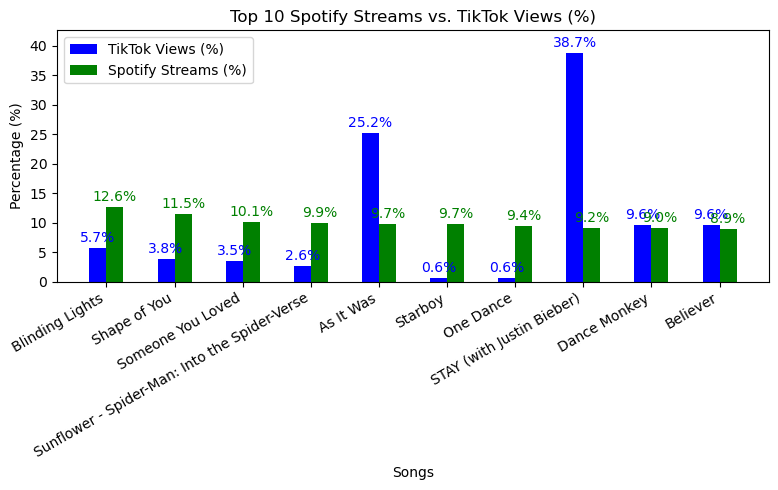

In [20]:
# Prepare the bar chart
x = np.arange(len(top_ten_spotify_df['Song']))  # the label locations
width = 0.25                                   # the width of the bars

# Create the subplot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the bars
tiktok_bar = ax.bar(x-width/2, top_ten_spotify_df['TikTok Percentage'], width, label='TikTok Views (%)', color='blue')
spotify_bar = ax.bar(x+width/2, top_ten_spotify_df['Spotify Percentage'], width, label='Spotify Streams (%)', color='green')

# Formatting
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Songs')
ax.set_title('Top 10 Spotify Streams vs. TikTok Views (%)')
ax.set_xticks(x)
ax.set_xticklabels(top_ten_spotify_df['Song'], rotation=30, ha='right')  # Rotate labels for readability
ax.legend()

# Fix y-limit to match percentage values
max_percentage = max(top_ten_spotify_df['TikTok Percentage'].max(), top_ten_spotify_df['Spotify Percentage'].max())
ax.set_ylim(0, max_percentage * 1.1)     # Set y-limit slightly above max percentage

# Add labels above bars
for i, (tiktok, spotify) in enumerate(zip(top_ten_spotify_df['TikTok Percentage'], top_ten_spotify_df['Spotify Percentage'])):
    ax.text(i - width/2, tiktok + 0.5, f"{tiktok:.1f}%", ha='center', va='bottom', fontsize=10, color='blue')
    ax.text(i + width/2, spotify + 0.5, f"{spotify:.1f}%", ha='center', va='bottom', fontsize=10, color='green')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### Analysis Summary
##### Switching the control to Spotify streams shows key differences in how music performs across platforms. On Spotify, the top ten songs decline steadily, from 12.6% at #1 to 8.9% at #10, showing a consistent distribution of streams. This suggests that Spotify success is driven by sustained listening habits rather than sudden spikes. 
##### In contrast, TikTok views are much more unpredictable, with two songs (#5 and #8) spiking. This suggests that TikTok favors sudden bursts of virality, likely driven by trends, rather than a smooth decline like Spotify. 